# MALIPIERO PROJECT

## data gathering and filtering
## musicbrainz api

In [1]:
# First import
import requests as r
import pandas as pd
import numpy as np
import json
from time import sleep

# Second import
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path

# Constants
output_dir = './network_files'

In [2]:
# musicbrainz id of Malipiero

mbid = "ae096b2a-93b5-4139-a35f-53ebcbfb22f3"

request_response = r.get(
    "https://musicbrainz.org/ws/2/release-group/?artist={}&inc=artist-credits&offset=0&limit=100&fmt=json".format(mbid)
)

In [3]:
# The HTTP 200 Ok
request_response

<Response [200]>

In [4]:
json.loads(request_response.text).keys()

dict_keys(['release-group-offset', 'release-groups', 'release-group-count'])

In [6]:
# information of a single release
json.loads(request_response.text)['release-groups'][5]

{'primary-type-id': 'f529b476-6e62-324f-b0aa-1f3e33d313fc',
 'id': '26f019a8-4d60-4782-823e-1950e39c948b',
 'secondary-types': [],
 'primary-type': 'Album',
 'artist-credit': [{'name': 'Malipiero',
   'artist': {'sort-name': 'Malipiero, Gian Francesco',
    'type-id': 'b6e035f4-3ce9-331c-97df-83397230b0df',
    'name': 'Gian Francesco Malipiero',
    'type': 'Person',
    'id': 'ae096b2a-93b5-4139-a35f-53ebcbfb22f3',
    'disambiguation': 'composer'},
   'joinphrase': ', '},
  {'artist': {'id': '7be0b588-030c-4904-836f-71ff43a2dfec',
    'disambiguation': 'composer',
    'name': 'Anton Webern',
    'type': 'Person',
    'type-id': 'b6e035f4-3ce9-331c-97df-83397230b0df',
    'sort-name': 'Webern, Anton'},
   'joinphrase': ', ',
   'name': 'Webern'},
  {'name': 'Dallapiccola',
   'artist': {'name': 'Luigi Dallapiccola',
    'type': 'Person',
    'id': 'bfcbf9b0-0969-40b3-bc58-ba6174962f48',
    'disambiguation': 'Italian composer',
    'sort-name': 'Dallapiccola, Luigi',
    'type-id': '

In [7]:
# transform json to pandas dataframe
pd.json_normalize(json.loads(request_response.text)['release-groups'])

,artist-credit,title,first-release-date,disambiguation,secondary-type-ids,primary-type-id,id,secondary-types,primary-type
0,"[{'name': 'Gian Francesco Malipiero', 'artist'...","Symphonies no. 9 ""dell'ahimè"" / no. 10 ""Atropo...",1994-09,,[],f529b476-6e62-324f-b0aa-1f3e33d313fc,0070309f-6656-4f17-a930-f8b1568e190f,[],Album
1,"[{'name': 'Gian Francesco Malipiero', 'artist'...",Piano Concertos 1-6 / Variazioni senza tema,2007,,[],f529b476-6e62-324f-b0aa-1f3e33d313fc,11d56587-ca40-4073-9274-cc0b38e2518a,[],Album
2,"[{'name': 'Maderna', 'joinphrase': ', ', 'arti...",The Glory of Music in Venice,2011-12-21,,[],f529b476-6e62-324f-b0aa-1f3e33d313fc,1a6e6669-6dd1-4ef3-a78d-5c06e6a7587a,[],Album
3,"[{'name': 'Louis Aubert', 'joinphrase': ', ', ...",Aubert: Sillages / Dukas/Roussel/Bartok/Schmit...,1990,,[],f529b476-6e62-324f-b0aa-1f3e33d313fc,1fc42a15-a1d9-4fa4-8e47-ea954781f7dd,[],Album
4,"[{'joinphrase': '; ', 'artist': {'type-id': 'b...",Il finto Arlecchino / Vivaldiana / Sette inven...,1992-11,,[],f529b476-6e62-324f-b0aa-1f3e33d313fc,26dc4881-db16-4f99-9462-cb40d8ebfb04,[],Album
5,"[{'name': 'Malipiero', 'artist': {'sort-name':...",Bruno Maderna interpreta Malipiero e Webern / ...,1989,,[],f529b476-6e62-324f-b0aa-1f3e33d313fc,26f019a8-4d60-4782-823e-1950e39c948b,[],Album
6,"[{'artist': {'type': 'Person', 'name': 'Gian F...",Complete Songs for Soprano & Piano,2021-10-29,,[],f529b476-6e62-324f-b0aa-1f3e33d313fc,2f92b526-6131-4e89-b26e-842d310bdc43,[],Album
7,[{'artist': {'name': 'Gian Francesco Malipiero...,Fantasie di ogni giorno / Passacaglie / Concerti,2014-10,,[],f529b476-6e62-324f-b0aa-1f3e33d313fc,36902f69-d344-4987-ac01-27d91ac62e90,[],Album
8,"[{'joinphrase': ', ', 'artist': {'sort-name': ...","Respighi: Antiche danze ed arie per liuto, sui...",1993,,[],f529b476-6e62-324f-b0aa-1f3e33d313fc,3c576306-cae9-3f63-843d-969eaa5b4ddf,[],Album
9,"[{'name': 'Malipiero', 'artist': {'type-id': '...",String Quartets (complete),2007,,[],f529b476-6e62-324f-b0aa-1f3e33d313fc,3e719afc-a5b3-416f-baaf-5d713d514764,[],Album


In [8]:
json.loads(request_response.text)['release-group-count']

24

In [9]:
# fetch 100 albums starting from the position 0 (i=0, step = 100)
json.loads(request_response.text)['release-group-offset']

0

In [10]:
# get the number of releases-groups of some artist

def get_release_group_count(mbid):
    request_response = r.get(
    "https://musicbrainz.org/ws/2/release-group/?artist={}&inc=artist-credits&offset=0&limit=100&fmt=json".format(mbid)
    )
    release_group_json = json.loads(request_response.text)
    return release_group_json['release-group-count']

In [11]:
# get df from albums for a given MBID an offset
def get_release_groups_df(mbid, offset):
    sleep(1)
    
    request_response = r.get(
        "https://musicbrainz.org/ws/2/release-group/?artist={}&inc=artist-credits&offset=0&limit=100&fmt=json".format(mbid,offset)
    )
    release_groups_json = json.loads(request_response.text)
    return pd.json_normalize(release_groups_json['release-groups'])

In [12]:
get_release_group_count(mbid)

24

In [16]:
release_groups_dfs = [get_release_groups_df(mbid,offset) for offset in np.arange(0, get_release_group_count(mbid), step=100)]

release_groups_df = pd.concat(release_groups_dfs, sort=True).reset_index(drop=True)

In [17]:
print(json.dumps(release_groups_df['artist-credit'][5], indent=2))

[
  {
    "artist": {
      "name": "Gian Francesco Malipiero",
      "type": "Person",
      "disambiguation": "composer",
      "sort-name": "Malipiero, Gian Francesco",
      "id": "ae096b2a-93b5-4139-a35f-53ebcbfb22f3",
      "type-id": "b6e035f4-3ce9-331c-97df-83397230b0df"
    },
    "joinphrase": ", ",
    "name": "Malipiero"
  },
  {
    "name": "Webern",
    "joinphrase": ", ",
    "artist": {
      "type-id": "b6e035f4-3ce9-331c-97df-83397230b0df",
      "id": "7be0b588-030c-4904-836f-71ff43a2dfec",
      "sort-name": "Webern, Anton",
      "name": "Anton Webern",
      "type": "Person",
      "disambiguation": "composer"
    }
  },
  {
    "artist": {
      "sort-name": "Dallapiccola, Luigi",
      "id": "bfcbf9b0-0969-40b3-bc58-ba6174962f48",
      "type": "Person",
      "disambiguation": "Italian composer",
      "name": "Luigi Dallapiccola",
      "type-id": "b6e035f4-3ce9-331c-97df-83397230b0df"
    },
    "name": "Dallapiccola",
    "joinphrase": "; "
  },
  {
    "art

In [19]:
release_groups_df['artists'] = release_groups_df['artist-credit'].apply(
    lambda l: [artist_dict['artist']['name'] for artist_dict in l if 'artist' in artist_dict.keys()]
)

In [21]:
release_groups_df['artists'][10:20]

10    [Gian Francesco Malipiero, Quartetto d'archi d...
11    [Gian Francesco Malipiero, Orchestra sinfonica...
12    [Manuel de Falla, Gian Francesco Malipiero, Nu...
13             [Gian Francesco Malipiero, Aldo Orvieto]
14    [Bohuslav Martinů, Gian Francesco Malipiero, B...
15    [Gian Francesco Malipiero, Orpheus String Quar...
16    [Gian Francesco Malipiero, Московский симфонич...
17    [Gian Francesco Malipiero, Московский симфонич...
18    [Gian Francesco Malipiero, Giorgio Federico Gh...
19             [Gian Francesco Malipiero, Aldo Orvieto]
Name: artists, dtype: object

In [22]:
# creating the network
# an undirected graph
G = nx.Graph()

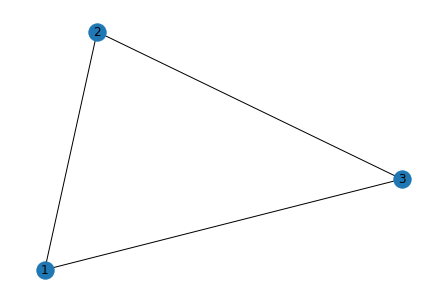

In [24]:
# EXAMPLE FOR A SIMPLE GRAPH
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,3)])
nx.draw(G, with_labels=True)

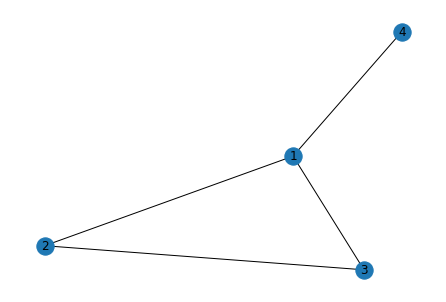

In [26]:
# SECOND EXAMPLE FOR GRAPH WITH A NODE THAT HAVE RELATION ONLY ONE NODE FROM OTHER NETWORK
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,3)])
G.add_edges_from([(1,4)])
nx.draw(G, with_labels=True)

In [27]:
release_groups_df.loc[5:10]

,artist-credit,disambiguation,first-release-date,id,primary-type,primary-type-id,secondary-type-ids,secondary-types,title,artists
5,[{'artist': {'name': 'Gian Francesco Malipiero...,,1989,26f019a8-4d60-4782-823e-1950e39c948b,Album,f529b476-6e62-324f-b0aa-1f3e33d313fc,[],[],Bruno Maderna interpreta Malipiero e Webern / ...,"[Gian Francesco Malipiero, Anton Webern, Luigi..."
6,[{'artist': {'id': 'ae096b2a-93b5-4139-a35f-53...,,2021-10-29,2f92b526-6131-4e89-b26e-842d310bdc43,Album,f529b476-6e62-324f-b0aa-1f3e33d313fc,[],[],Complete Songs for Soprano & Piano,"[Gian Francesco Malipiero, Vansìsiem Lied Duo]"
7,[{'artist': {'type-id': 'b6e035f4-3ce9-331c-97...,,2014-10,36902f69-d344-4987-ac01-27d91ac62e90,Album,f529b476-6e62-324f-b0aa-1f3e33d313fc,[],[],Fantasie di ogni giorno / Passacaglie / Concerti,"[Gian Francesco Malipiero, Orchestra sinfonica..."
8,"[{'artist': {'name': 'Ottorino Respighi', 'typ...",,1993,3c576306-cae9-3f63-843d-969eaa5b4ddf,Album,f529b476-6e62-324f-b0aa-1f3e33d313fc,[],[],"Respighi: Antiche danze ed arie per liuto, sui...","[Ottorino Respighi, Hugo Wolf, Gian Francesco ..."
9,[{'artist': {'id': 'ae096b2a-93b5-4139-a35f-53...,,2007,3e719afc-a5b3-416f-baaf-5d713d514764,Album,f529b476-6e62-324f-b0aa-1f3e33d313fc,[],[],String Quartets (complete),"[Gian Francesco Malipiero, Orpheus String Quar..."
10,[{'artist': {'name': 'Gian Francesco Malipiero...,,1996,496dc6b4-fdc6-478e-a7a1-312846942e72,Album,f529b476-6e62-324f-b0aa-1f3e33d313fc,[],[],The String Quartets,"[Gian Francesco Malipiero, Quartetto d'archi d..."


In [32]:
release_groups_df['artists'].values

array([list(['Gian Francesco Malipiero', 'Московский симфонический оркестр', 'Antonio de Almeida']),
       list(['Gian Francesco Malipiero', 'Sandro Ivo Bartoli', 'Rundfunk‐Sinfonieorchester Saarbrücken', 'Michele Carulli']),
       list(['Bruno Maderna', 'Gian Francesco Malipiero', 'Ermanno Wolf‐Ferrari', 'Baldassare Galuppi', 'Tomaso Giovanni Albinoni', 'Antonio Vivaldi', 'Giovanni Gabrieli', 'I Solisti Italiani']),
       list(['Louis Aubert', 'Paul Dukas', 'Albert Roussel', 'Béla Bartók', 'Florent Schmitt', 'Gian Francesco Malipiero', 'Eugene Goossens', 'Abel Decaux', 'Marie-Catherine Girod']),
       list(['Gian Francesco Malipiero', 'Orchestra di Padova e del Veneto', 'Peter Maag']),
       list(['Gian Francesco Malipiero', 'Anton Webern', 'Luigi Dallapiccola', 'Bruno Maderna', 'Sergiu Celibidache']),
       list(['Gian Francesco Malipiero', 'Vansìsiem Lied Duo']),
       list(['Gian Francesco Malipiero', 'Orchestra sinfonica di Roma', 'Francesco La Vecchia']),
       list(['Ott

In [30]:
G = nx.Graph()

for group in release_groups_df['artists'].values:
    if len(group) > 1:
        combination_artists = list(itertools.combinations(group, 2))
        G.add_edges_from(combination_artists)
    else:
        G.add_nodes_from(group)
        
print("The network has {} nodes and {} edges".format(len(G.nodes()), len(G.edges())))

The network has 53 nodes and 161 edges


In [ ]:
network_release_group_df

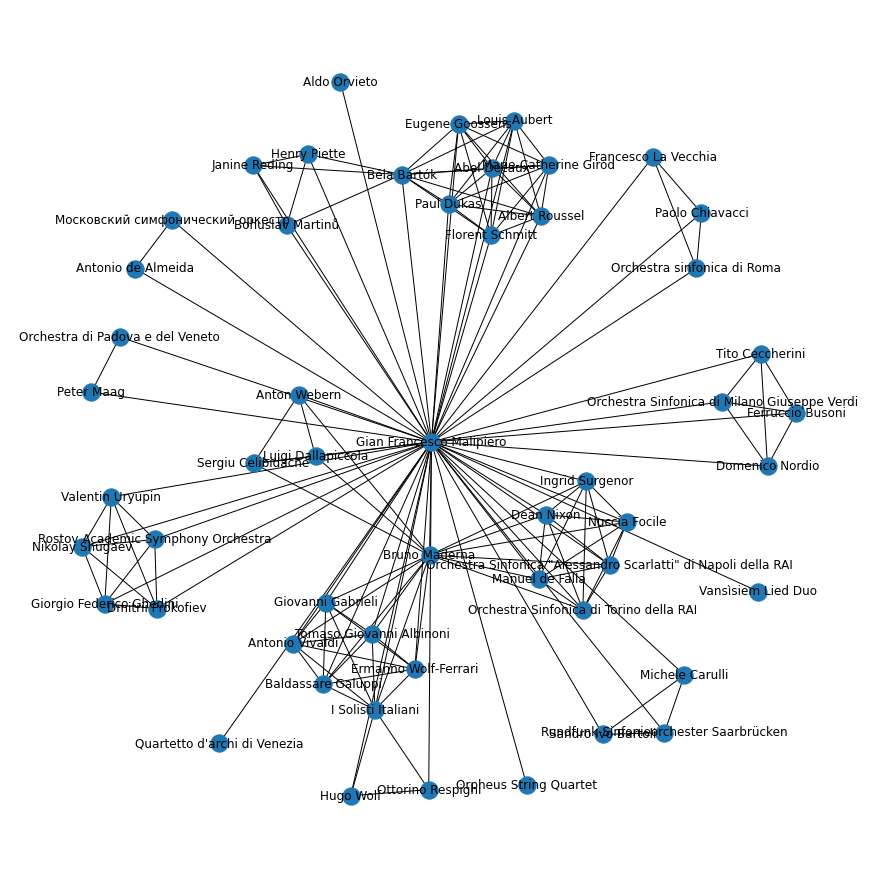

In [33]:
#Colabaration of Gian Francesco Malipiero
plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True)

The network has 53 nodes and 161 edges


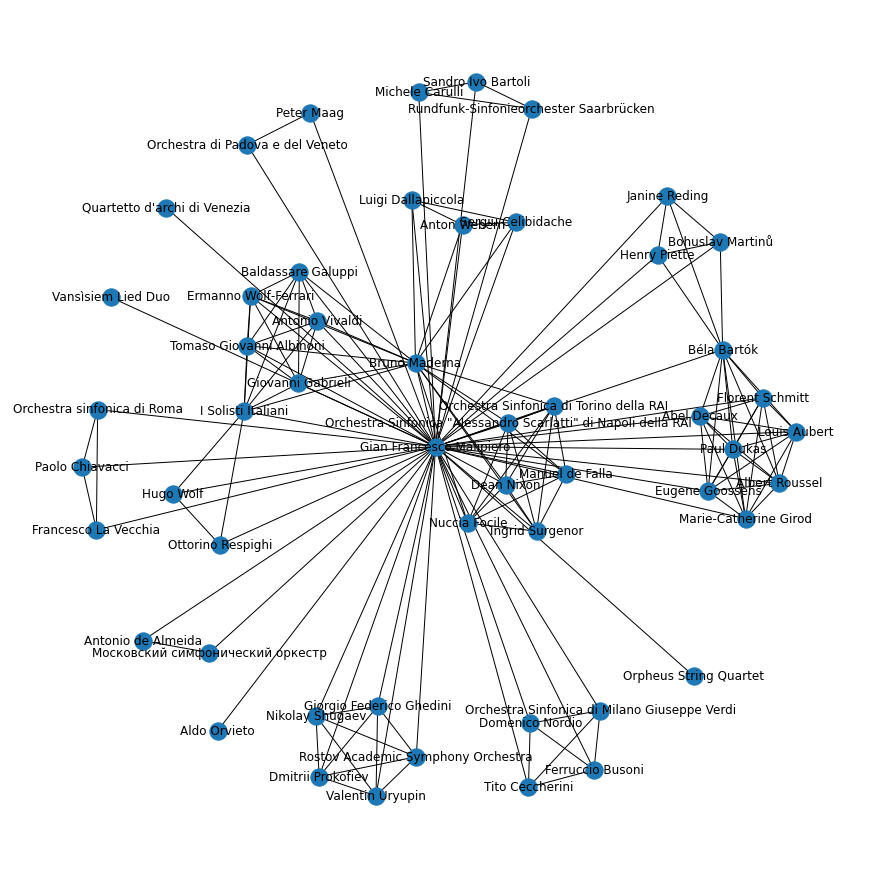

In [54]:
collab_release_groups_df = release_groups_df[release_groups_df['artists'].apply(lambda l: len(l) > 1)].reset_index(drop=True)

network_release_group_values = collab_release_groups_df['artists'].apply(
    lambda l: pd.DataFrame(list(itertools.combinations(l,2)), columns=['source','target'])
).values

network_release_group_df = pd.concat(network_release_group_values)

G = nx.from_pandas_edgelist(network_release_group_df)

print("The network has {} nodes and {} edges".format(len(G.nodes()), len(G.edges())))

plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True)



The network has 53 nodes and 161 edges


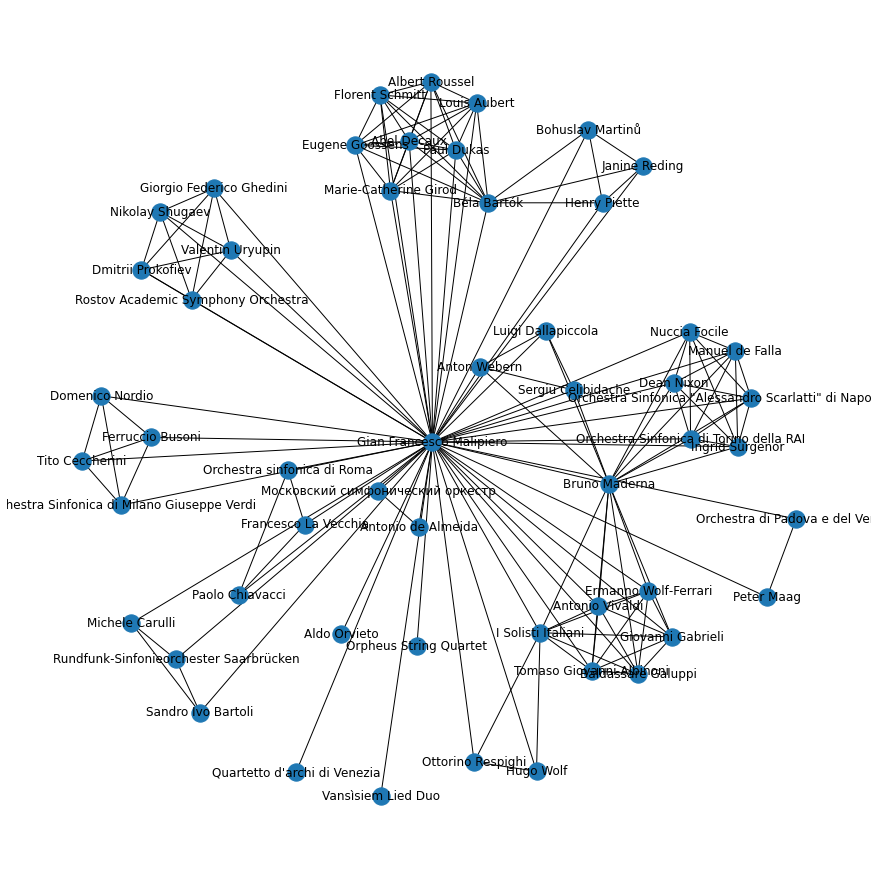

In [58]:
nodes_list = release_groups_df['artists'].explode().unique().tolist()
release_group_adjancency_df = pd.DataFrame(0, index=nodes_list, columns=nodes_list)

for list_artists in release_groups_df['artists']:
    release_group_adjancency_df.loc[list_artists, list_artists] += 1

G = nx.from_pandas_adjacency(release_group_adjancency_df)

G.remove_edges_from(nx.selfloop_edges(G))

print("The network has {} nodes and {} edges".format(len(G.nodes()), len(G.edges())))

plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True)

In [59]:
release_group_adjancency_df

,Gian Francesco Malipiero,Московский симфонический оркестр,Antonio de Almeida,Sandro Ivo Bartoli,Rundfunk‐Sinfonieorchester Saarbrücken,Michele Carulli,Bruno Maderna,Ermanno Wolf‐Ferrari,Baldassare Galuppi,Tomaso Giovanni Albinoni,...,Giorgio Federico Ghedini,Nikolay Shugaev,Dmitrii Prokofiev,Rostov Academic Symphony Orchestra,Valentin Uryupin,Ferruccio Busoni,Domenico Nordio,Orchestra Sinfonica di Milano Giuseppe Verdi,Tito Ceccherini,Paolo Chiavacci
Gian Francesco Malipiero,24,5,5,1,1,1,3,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Московский симфонический оркестр,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antonio de Almeida,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sandro Ivo Bartoli,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rundfunk‐Sinfonieorchester Saarbrücken,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Michele Carulli,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bruno Maderna,3,0,0,0,0,0,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Ermanno Wolf‐Ferrari,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Baldassare Galuppi,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Tomaso Giovanni Albinoni,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
def get_G_from_mbid(mbid):
    # get all albums
    release_groups_dfs = [get_release_groups_df(mbid, offset) for offset in np.arange(0, get_release_group_count(mbid), step=100)]
    
    #Concat all of them
    release_groups_df = pd.concat(release_groups_dfs, sort=True).reset_index(drop=True)
    
    #Get the list of artist in album from its data structure
    release_groups_df['artists'] = release_groups_df['artist-credit'].apply(
        lambda l:[artist_dict['artist']['name'] for artist_dict in l if 'artist' in artist_dict.keys()]
    )
    
    #Get the list of artist for all albums
    list_relations = release_groups_df['artists'].values
    
    #Creating an undirected graph
    G = nx.Graph()
    
    #Iterate for each lists of artists
    for group in list_relations:
        if len(group) > 1:
            type_combinations_in_activity = list(itertools.combinations(group, 2))
            G.add_edges_from(type_combinations_in_activity)
        else:
            G.add_nodes_from(group)
    
    print("The network has {} nodes and {} edges".format(len(G.nodes()), len(G.edges())))
    
    return G

In [61]:
nodes = []
for node in G.nodes():
    nodes.append({
        'id': str(node),
        'degree': G.degree()[node]
    })
    
edges = []
for edge in G.edges():
    edges.append({
        'source': edge[0],
        'target': edge[1],
        'weight': 1
    })
    
Path(output_dir).mkdir(parents=True, exist_ok=True)

with open("{}/{}-collaboration-graph.json".format(output_dir, mbid), 'w') as file:
    json.dump({'nodes': nodes, 'links': edges}, file, indent=4)